In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('all_stocks_5yr.csv',parse_dates=True, index_col='date')

In [3]:
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [5]:
df = df[df['Name']=='AAPL']

In [6]:
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1259 non-null   float64
 1   high    1259 non-null   float64
 2   low     1259 non-null   float64
 3   close   1259 non-null   float64
 4   volume  1259 non-null   int64  
 5   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 68.9+ KB


In [9]:
df = df[['close']]

In [10]:
df.describe()

,close
count,1259.000000
mean,109.066698
std,30.556812
min,55.789900
25%,84.830650
50%,109.010000
75%,127.120000
max,179.260000


In [11]:
df['returns'] = df.close.pct_change()

In [12]:
df.head()

,close,returns
date,,
2013-02-08,67.8542,NaN
2013-02-11,68.5614,0.010422
2013-02-12,66.8428,-0.025067
2013-02-13,66.7156,-0.001903
2013-02-14,66.6556,-0.000899


In [13]:
df['log_returns'] = np.log(1 + df['returns'])

In [14]:
df.head()

,close,returns,log_returns
date,,,
2013-02-08,67.8542,NaN,NaN
2013-02-11,68.5614,0.010422,0.010368
2013-02-12,66.8428,-0.025067,-0.025386
2013-02-13,66.7156,-0.001903,-0.001905
2013-02-14,66.6556,-0.000899,-0.000900


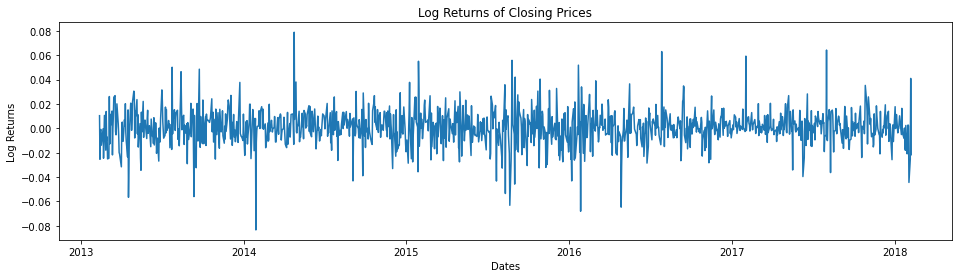

In [21]:
plt.figure(figsize = (16,4))
plt.plot(df.log_returns)
plt.title('Log Returns of Closing Prices')
plt.xlabel('Dates')
plt.ylabel('Log Returns')
plt.show()

In [22]:
df.dropna(inplace = True)

In [23]:
df.head()

,close,returns,log_returns
date,,,
2013-02-11,68.5614,0.010422,0.010368
2013-02-12,66.8428,-0.025067,-0.025386
2013-02-13,66.7156,-0.001903,-0.001905
2013-02-14,66.6556,-0.000899,-0.000900
2013-02-15,65.7371,-0.013780,-0.013876


In [24]:
#Input variable
X = df[['close','log_returns']].values

In [25]:
X

array([[ 6.85614000e+01,  1.03684085e-02],
       [ 6.68428000e+01, -2.53861002e-02],
       [ 6.67156000e+01, -1.90478530e-03],
       ...,
       [ 1.56490000e+02, -2.53018324e-02],
       [ 1.63030000e+02,  4.09421228e-02],
       [ 1.59540000e+02, -2.16395585e-02]])

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range =(0,1)).fit(X)
X_scaled = scaler.transform(X)

In [32]:
X_scaled[:5]

array([[0.103438  , 0.57786997],
       [0.08951884, 0.35729501],
       [0.08848863, 0.50215479],
       [0.08800268, 0.50835504],
       [0.08056363, 0.42830496]])

In [29]:
#Output Variable
Y = [x[0] for x in X_scaled]

In [31]:
Y[:5]

[0.10343799834939804,
 0.08951883897397017,
 0.08848863004079521,
 0.08800268243080722,
 0.0805636344345716]

In [34]:
#Train and test Split
split = int(len(X_scaled) * 0.8)
print(split)

1006


In [35]:
X_train = X_scaled[:split]
X_test = X_scaled[split:len(X_scaled)]
Y_train = Y[:split]
Y_test = Y[split:len(Y)] 

In [40]:
assert len(X_train) == len(Y_train)
assert len(X_test) == len(Y_test)

In [102]:
len(X_test)

252

In [50]:
n = 3
Xtrain = list()
Ytrain = list()
Xtest = list()
Ytest = list()
for i in range(n,len(X_train)):
    Xtrain.append(X_train[i-n:i,:X_train.shape[1]])
    Ytrain.append(Y_train[i])
for i in range(n,len(X_test)):
    Xtest.append(X_test[i-n:i,:X_test.shape[1]])
    Ytest.append(Y_test[i])

In [71]:
Xtrain , Ytrain = (np.array(Xtrain),np.array(Ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, Ytest = (np.array(Xtest),np.array(Ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [75]:
print(Xtrain.shape)
print(Ytrain.shape)
print('---'*20)
print(Xtest.shape)
print(Ytest.shape)

(1003, 3, 2)
(1003,)
------------------------------------------------------------
(249, 3, 2)
(249,)


In [81]:
#LSTM Model
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [82]:
model = Sequential()
model.add(LSTM(4, input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(Xtrain, Ytrain, epochs=100, validation_data=(Xtest, Ytest), batch_size = 16, verbose=1)

Epoch 1/100
63/63 [==============================] - 2s 7ms/step - loss: 0.0657 - val_loss: 0.3533
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0373 - val_loss: 0.2574
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0301 - val_loss: 0.2013
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0227 - val_loss: 0.1426
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0881
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0418
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0188
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 5.3182e-04 - val_loss: 0.0115
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 2.9841e-04 - val_loss: 0.0103
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 2.7584e-04 - val_loss: 0.01

63/63 [==============================] - 0s 2ms/step - loss: 1.8155e-04 - val_loss: 0.0086
Epoch 81/100
63/63 [==============================] - 0s 2ms/step - loss: 1.7859e-04 - val_loss: 0.0089
Epoch 82/100
63/63 [==============================] - 0s 2ms/step - loss: 1.7976e-04 - val_loss: 0.0087
Epoch 83/100
63/63 [==============================] - 0s 2ms/step - loss: 1.8068e-04 - val_loss: 0.0081
Epoch 84/100
63/63 [==============================] - 0s 2ms/step - loss: 1.7588e-04 - val_loss: 0.0092
Epoch 85/100
63/63 [==============================] - 0s 2ms/step - loss: 1.7776e-04 - val_loss: 0.0082
Epoch 86/100
63/63 [==============================] - 0s 2ms/step - loss: 1.7791e-04 - val_loss: 0.0089
Epoch 87/100
63/63 [==============================] - 0s 2ms/step - loss: 1.8061e-04 - val_loss: 0.0087
Epoch 88/100
63/63 [==============================] - 0s 2ms/step - loss: 1.7578e-04 - val_loss: 0.0082
Epoch 89/100
63/63 [==============================] - 0s 2ms/step - loss: 1.7

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 112       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [84]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

8/8 [==============================] - 0s 887us/step


In [103]:
len(testPredict)

249

In [106]:
len(Ytest)

249

In [114]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [116]:
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [132]:
print(len(testPredict))
print(type(testPredict))

249
<class 'list'>


In [118]:
df.close.tail()

date
2018-02-01    167.78
2018-02-02    160.50
2018-02-05    156.49
2018-02-06    163.03
2018-02-07    159.54
Name: close, dtype: float64

In [137]:
eval_df = pd.DataFrame(df['close'][-249:])
eval_df = eval_df.reset_index()

In [138]:
pred_df = pd.Series(testPredict).to_frame(name='Predictions')
pred_df = pred_df.reset_index(drop=True)

In [139]:
eval_df = pd.concat([eval_df,pred_df],axis=1)
eval_df = eval_df.set_index('date', drop=True)

In [140]:
eval_df

,close,Predictions
date,,
2017-02-13,133.290,131.474780
2017-02-14,135.020,132.347942
2017-02-15,135.510,133.689662
2017-02-16,135.345,134.438657
2017-02-17,135.720,134.330481
...,...,...
2018-02-01,167.780,153.213097
2018-02-02,160.500,154.407953
2018-02-05,156.490,150.024273


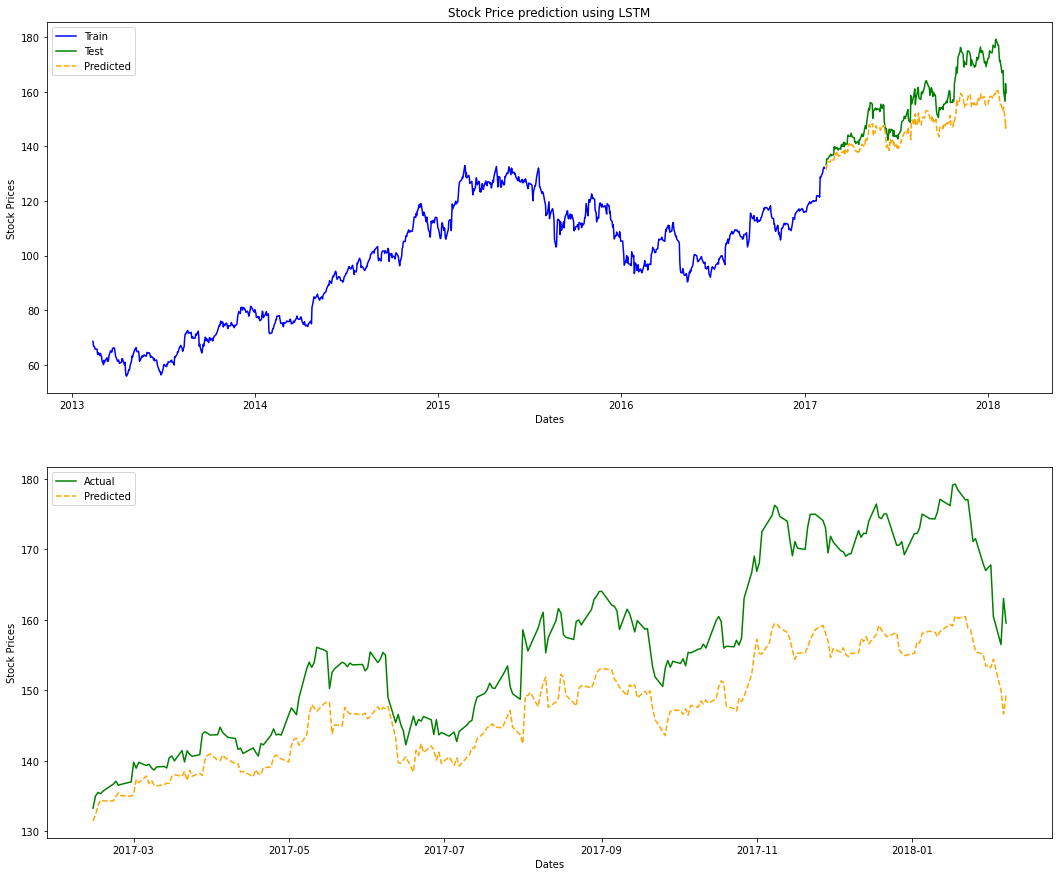

In [143]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(18,15))

axis1.plot(df['close'][:-249], color = 'blue', label = 'Train')
axis1.plot(df['close'][-249:], color = 'green', label = 'Test')
axis1.plot(eval_df['Predictions'], color = 'orange', label = 'Predicted', linestyle = '--')
axis1.set_xlabel('Dates')
axis1.set_ylabel('Stock Prices')
axis1.set_title('Stock Price prediction using LSTM')
axis1.legend()

axis2.plot(eval_df['close'], color = 'green', label = 'Actual')
axis2.plot(eval_df['Predictions'], color = 'orange', label = 'Predicted', linestyle = '--')
axis2.set_xlabel('Dates')
axis2.set_ylabel('Stock Prices')
axis2.legend()

plt.show()

In [142]:
from sklearn.metrics import mean_squared_error
from math import sqrt
root_mse = sqrt(mean_squared_error(eval_df['close'],eval_df['Predictions']))
print(root_mse)

9.950361183772229
